In [3]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Read in Data

In [4]:
data = pd.read_csv('/Users/JoshuaMeldrum/Downloads/Ironhack/Final Project/bank_loans.csv')
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,7d9953de-f423-466f-ad17-1aa96a925aa7,7d91c943-f6f8-45e9-aedc-cdcddf7401dd,Charged Off,219538,Short Term,751.0,1611618.0,10+ years,Home Mortgage,Other,11603.49,21.0,NaN,9,0,79572,662882.0,0.0,0.0
1,9cdffd96-316c-4e45-9164-ecaf51b9adf8,a33117f6-7b26-45dd-9bd4-ec295e42b1b3,Charged Off,343596,Short Term,751.0,1112754.0,5 years,Home Mortgage,Debt Consolidation,14744.00,16.4,NaN,8,0,289560,483098.0,0.0,0.0
2,46a19861-3a50-410d-a633-fa9badb00dd2,9759b8aa-18d2-499f-a723-da13a6c547e6,Charged Off,445896,Short Term,751.0,1886947.0,7 years,Home Mortgage,Debt Consolidation,13413.05,10.4,NaN,10,0,80142,653466.0,0.0,0.0
3,9fcc08ec-6ac5-4ac9-8fd5-446632bb2d3c,a1a25124-1c7e-4344-af01-832d0f1e604f,Charged Off,112552,Short Term,751.0,818026.0,5 years,Home Mortgage,Debt Consolidation,12481.67,25.5,NaN,12,0,82764,134992.0,0.0,0.0
4,a719dbc6-9249-4f04-bcbc-114119ac9a9a,267bfa82-b7c3-40a0-8b7a-a514fc957f1d,Charged Off,365090,Short Term,751.0,863341.0,10+ years,Own Home,other,3136.71,15.1,NaN,12,0,134520,1226390.0,0.0,0.0


In [5]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [6]:
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [7]:
data.shape

(95449, 19)

In [8]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.544900e+04,76295.000000,7.629500e+04,95449.000000,95449.000000,44779.000000,95449.000000,95449.000000,9.544900e+04,9.544800e+04,95255.000000,95439.000000
mean,1.230550e+07,716.615230,1.382671e+06,18467.599465,18.215980,34.923067,11.120515,0.168404,2.945907e+05,7.664124e+05,0.118115,0.028982
std,3.243235e+07,28.117302,9.147446e+05,12188.797969,7.013998,21.969691,5.002770,0.481720,3.640228e+05,8.570451e+06,0.351877,0.256434
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795640e+05,704.000000,8.525775e+05,10199.010000,13.500000,16.000000,8.000000,0.000000,1.121570e+05,2.737295e+05,0.000000,0.000000
50%,3.129720e+05,722.000000,1.184004e+06,16204.150000,17.000000,32.000000,10.000000,0.000000,2.092850e+05,4.687760e+05,0.000000,0.000000
75%,5.289020e+05,739.000000,1.661626e+06,24005.930000,21.700000,51.000000,14.000000,0.000000,3.678780e+05,7.855320e+05,0.000000,0.000000
max,1.000000e+08,751.000000,3.647544e+07,435843.280000,70.500000,176.000000,76.000000,15.000000,1.298696e+07,1.539738e+09,7.000000,15.000000


In [9]:
x=pd.DataFrame(data.isna().sum()/len(data)).reset_index()
x

,index,0
0,Loan ID,0.000000
1,Customer ID,0.000000
2,Loan Status,0.000000
3,Current Loan Amount,0.000000
4,Term,0.000000
5,Credit Score,0.200673
6,Annual Income,0.200673
7,Years in current job,0.041656
8,Home Ownership,0.000000
9,Purpose,0.000000


In [10]:
data.shape

(95449, 19)

# Addressing Missing Values

In [11]:
data.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [12]:
# Function to calculate missing values by column (Function found on Stack Overflow)
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,50670,53.1
Credit Score,19154,20.1
Annual Income,19154,20.1
Years in current job,3976,4.2
Bankruptcies,194,0.2
Tax Liens,10,0.0
Maximum Open Credit,1,0.0


In [14]:
#too many missing values, dropped "Months since last delinquent" column
data.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [15]:
for i in data['Tax Liens'][data['Tax Liens'].isnull() == True].index:
    data.drop(labels=i, inplace=True)
missing_values_table(data)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19150,20.1
Annual Income,19150,20.1
Years in current job,3976,4.2
Bankruptcies,184,0.2
Maximum Open Credit,1,0.0


In [16]:
for i in data['Maximum Open Credit'][data['Maximum Open Credit'].isnull() == True].index:
    data.drop(labels=i, inplace=True)
missing_values_table(data)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19149,20.1
Annual Income,19149,20.1
Years in current job,3976,4.2
Bankruptcies,184,0.2


In [17]:
for i in data['Bankruptcies'][data['Bankruptcies'].isnull() == True].index:
    data.drop(labels=i, inplace=True)
missing_values_table(data)

Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,20.1
Annual Income,19111,20.1
Years in current job,3976,4.2


In [18]:
data.fillna(data.mean(), inplace=True)
missing_values_table(data)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,3976,4.2


C:\Users\JoshuaMeldrum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Years in current job', ylabel='count'>

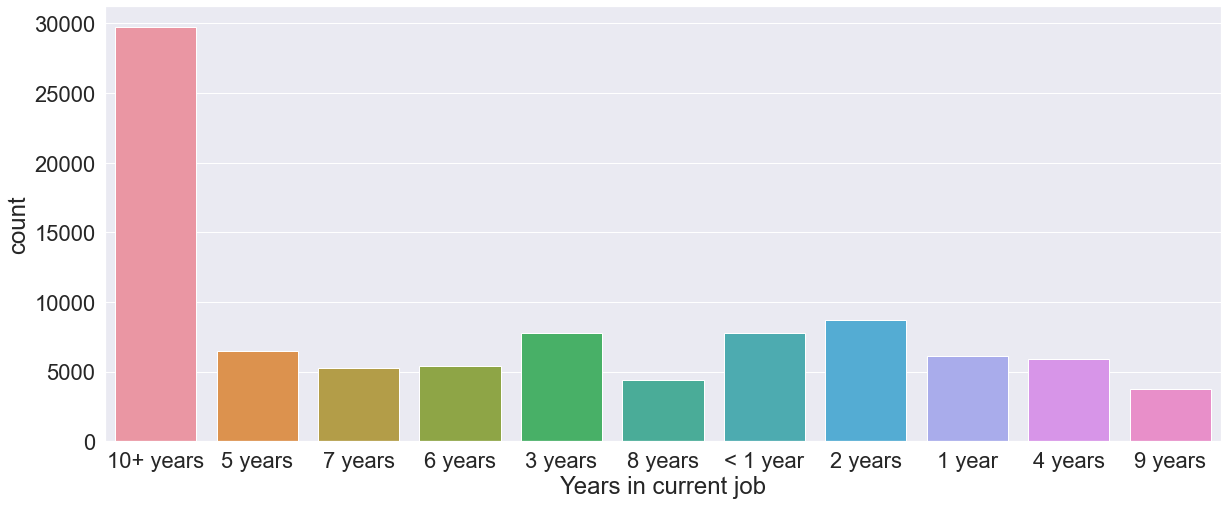

In [19]:
plt.figure(figsize=(20,8))

sns.countplot(data['Years in current job'])

In [20]:
data.fillna('10+ years', inplace=True)
missing_values_table(data)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Data Cleaning: Annual Income

In [21]:
#missing a decimal place
data["Annual Income"] = 0.1 * data["Annual Income"]

In [22]:
column = data["Annual Income"]
max_value = column.max()


print(max_value)

3647544.0


In [23]:
column = data["Credit Score"]
max_value = column.max()


print(max_value)

751.0


# Coorelations

In [24]:
correlations_data = data.corr()['Credit Score'].sort_values(ascending=False)

print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Current Loan Amount          0.133657
Years of Credit History      0.070243
Maximum Open Credit          0.012718
Annual Income               -0.004894
Current Credit Balance      -0.015017
Tax Liens                   -0.018979
Number of Open Accounts     -0.025921
Bankruptcies                -0.032725
Number of Credit Problems   -0.044268
Monthly Debt                -0.080485
Name: Credit Score, dtype: float64>


In [25]:
data.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [26]:
categorical_subset = data[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

categorical_subset = pd.get_dummies(categorical_subset)


data.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
data = pd.concat([data, categorical_subset], axis = 1)

In [27]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):    
  
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x

In [28]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(data, 0.6);

In [29]:
data.shape

(95254, 42)

In [30]:
features = data.drop(columns='Loan Status')
targets = pd.DataFrame(data['Loan Status'])

# Train Test Split

In [31]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76203, 41)
(19051, 41)
(76203, 1)
(19051, 1)


# Scaling

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

C:\Users\JoshuaMeldrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
y_train

array([1, 0, 0, ..., 0, 1, 1])

In [35]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [36]:
X_train

array([[ 2.70065580e+00,  1.24782873e+00,  1.11243015e+00, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.73215353e-01,  2.53675463e-01,  2.45418364e-01, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.56021719e-01, -7.49331182e-04, -4.59394717e-04, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       ...,
       [-3.73055413e-01, -7.49331182e-04, -4.59394717e-04, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.74551808e-01,  1.32736099e+00, -8.87305466e-01, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.66290460e-01,  9.69465817e-01,  1.32434023e+00, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02]])

In [37]:
X_test

array([[ 2.70065580e+00,  1.24782873e+00, -5.40302423e-01, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.75711378e-01,  1.00923195e+00, -3.82309611e-01, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.72244188e-01, -1.01884072e+00, -2.16937190e-01, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       ...,
       [-3.66322990e-01,  5.48448091e-02,  1.08669377e+00, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.72178449e-01, -7.49331182e-04, -4.59394717e-04, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02],
       [-3.65354535e-01, -2.17205851e+00, -3.06760866e-01, ...,
        -5.06509567e-02, -3.20098507e-02, -3.43868057e-02]])

# Mean Squared Error Function

In [38]:
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Training the Model

In [39]:
def fit_and_evaluate(model):
    
    model.fit(X_train, y_train)
    
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    return model_cross

# Regression

In [40]:
lr = LogisticRegression()
lr_cross = fit_and_evaluate(lr)

print('Logistic Regression Performance = %0.4f' % lr_cross)

Logistic Regression Performance = 0.8111


# KNN

In [41]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance = %0.4f' % knn_cross)

KNN Performance = 0.7815


In [43]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance = %0.4f' % knn_cross)

KNN Performance = 0.7815


# Random Forest

In [42]:
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance = %0.4f' % random_cross)

Random Forest Performance = 0.7923
